## Import libraries

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Read csv with answers

In [68]:
df = pd.read_csv("survey_results_public.csv")
df.head(10)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Student,"Yes, both",New Zealand,"Yes, full-time","Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Disagree,NaN,A bachelor's degree,White or of European descent,Disagree,Agree,Disagree,Agree,NaN,NaN
6,7,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Master's degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...",20 to 99 employees,...,Disagree,Male,A doctoral degree,White or of European descent,Disagree,Agree,Disagree,Agree,NaN,NaN
7,8,Professional developer,"Yes, both",Poland,No,Employed full-time,Master's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),Fewer than 10 employees,...,Somewhat agree,Male,A master's degree,White or of European descent,Agree,Somewhat agree,Disagree,Agree,NaN,NaN
8,9,Professional developer,"Yes, I program as a hobby",Colombia,"Yes, part-time",Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","5,000 to 9,999 employees",...,Strongly disagree,Male,A bachelor's degree,Hispanic or Latino/Latina,Somewhat agree,Strongly agree,Disagree,Strongly agree,NaN,NaN
9,10,Professional developer,"Yes, I program as a hobby",France,"Yes, full-time","Independent contractor, freelancer, or self-em...",Master's degree,Computer science or software engineering,It's complicated,NaN,...,Disagree,Male,A doctoral degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,NaN,NaN


### Checking unique values

In [69]:
print(df['CompanySize'].unique())
print("\n")
print(df['CompanyType'].unique())
print("\n")
print(df['Currency'].unique())

[nan '20 to 99 employees' '10,000 or more employees' '10 to 19 employees'
 'Fewer than 10 employees' '5,000 to 9,999 employees'
 '100 to 499 employees' '1,000 to 4,999 employees' '500 to 999 employees'
 "I don't know" 'I prefer not to answer']


[nan 'Privately-held limited company, not in startup mode'
 'Publicly-traded corporation'
 'Non-profit/non-governmental organization or private school/university'
 'Government agency or public school/university' 'Pre-series A startup'
 'Venture-funded startup' "I don't know"
 'Sole proprietorship or partnership, not in startup mode'
 'I prefer not to answer' 'State-owned company' 'Something else']


[nan 'British pounds sterling (£)' 'Canadian dollars (C$)'
 'U.S. dollars ($)' 'Euros (€)' 'Brazilian reais (R$)' 'Indian rupees (?)'
 'Polish zloty (zl)' 'Swedish kroner (SEK)' 'Russian rubles (?)'
 'Swiss francs' 'Australian dollars (A$)' 'Mexican pesos (MXN$)'
 'Japanese yen (¥)' 'Chinese yuan renminbi (¥)' 'Singapore dollars (S$)'
 'Bitcoin (btc

### Checking number of rows

In [70]:
df_prof = df[~df["Professional"].isin(["Student", "None of these"])]
print(f"Length of DataFrame: {len(df_prof)} rows")

df_stud = df[df["Professional"] == "Student"]
print(f"Length of DataFrame: {len(df_stud)} rows")

df_none = df[df["Professional"] == "None of these"]
print(f"Length of DataFrame: {len(df_none)} rows")

print(f"Sum of rows: {len(df_prof) + len(df_stud) + len(df_none)}")

Length of DataFrame: 42254 rows
Length of DataFrame: 8224 rows
Length of DataFrame: 914 rows
Sum of rows: 51392


## Preparing dataset

In [71]:
countries = ["Austria", "Belarus", "Belgium", "Bulgaria", "Croatia", "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Ireland", "Italy", "Lithuania", "Luxembourg", "Netherlands", "Norway", "Poland", "Portugal","Romania", "Serbia", "Slovak Republic", "Slovenia", "Spain", "Sweden", "Switzerland", "United Kingdom", "United States"]

columns = ["Respondent", "Gender", "Country", "EmploymentStatus", "FormalEducation", "CompanyType",  "CompanySize", "Currency", "Professional", "HaveWorkedLanguage", "JobSatisfaction", "Salary"] 
# "WantWorkLanguage" column excluded from the list

# Filter by country and select rows which we are interested in
df_filtered = df[df["Country"].isin(countries)][columns]

# Split into two groups
df_students = df_filtered[df_filtered["Professional"] == "Student"].reset_index(drop=True)

df_professionals = df_filtered[
    ~df_filtered["Professional"].isin(["Student", "None of these"])
].reset_index(drop=True)

print(f"Filtered: {len(df_filtered)} rows")
print(f"Students: {len(df_students)} rows")
print(f"Professionals: {len(df_professionals)} rows")
print(f"Sum of rows: {len(df_students) + len(df_professionals)}")

Filtered: 31863 rows
Students: 4536 rows
Professionals: 26703 rows
Sum of rows: 31239


In [72]:
df_professionals["Currency"].unique()

array(['British pounds sterling (£)', nan, 'U.S. dollars ($)',
       'Euros (€)', 'Polish zloty (zl)', 'Swedish kroner (SEK)',
       'Swiss francs', 'Australian dollars (A$)',
       'Chinese yuan renminbi (¥)', 'Japanese yen (¥)',
       'Indian rupees (?)', 'Canadian dollars (C$)', 'Bitcoin (btc)',
       'Mexican pesos (MXN$)', 'Russian rubles (?)',
       'Brazilian reais (R$)'], dtype=object)

## Assumption
We will focus only on group of professionals due to the fact that only those group of respondents can give us valuable information about salaries and job satisfaction levels. 

## Dictionaries creation

In [73]:
gender_map = {"Male": 0, "Female": 1, "Transgender": 2, "Gender non-conforming": 3, "Other": 4}

company_size_num = {
    "Fewer than 10 employees": 1, "10 to 19 employees": 2, "20 to 99 employees": 3, 
    "100 to 499 employees": 4, "500 to 999 employees": 5, "1,000 to 4,999 employees": 6, 
    "5,000 to 9,999 employees": 7, "10,000 or more employees": 8
}

currencies_to_dollar = {
    "British pounds sterling (£)": 1.33, "Euros (€)": 1.13, "Polish zloty (zl)": 0.27,
    "Swedish kroner (SEK)": 0.1, "Swiss francs": 1.2, "Australian dollars (A$)": 0.64,
    "Chinese yuan renminbi (¥)": 0.14, "Japanese yen (¥)": 0.0069, "Indian rupees (?)": 0.012,
    "Canadian dollars (C$)": 0.72, "Bitcoin (btc)": 103913.38, "Mexican pesos (MXN$)": 0.51,
    "Russian rubles (?)": 0.012, "Brazilian reais (R$)": 0.18, "U.S. dollars ($)": 1
}

countries = [
    "Austria", "Belarus", "Belgium", "Bulgaria", "Croatia", "Czech Republic", "Denmark",
    "Estonia", "Finland", "France", "Germany", "Greece", "Ireland", "Italy", "Lithuania",
    "Luxembourg", "Netherlands", "Norway", "Poland", "Portugal", "Romania", "Serbia",
    "Slovak Republic", "Slovenia", "Spain", "Sweden", "Switzerland", "United Kingdom", "United States"
]
country_map = {name: idx for idx, name in enumerate(countries)}

# Apply mappings and transformations

df_professionals["Gender"] = df_professionals["Gender"].astype(str).apply(lambda g: g.split(";")[0].strip())
df_professionals["Gender"] = df_professionals["Gender"].map(gender_map)

df_professionals["CompanySize"] = df_professionals["CompanySize"].map(company_size_num)

df_professionals["Salary"] = pd.to_numeric(df_professionals["Salary"], errors='coerce')

df_professionals = df_professionals.dropna(subset=["Salary", "Currency", "Country"])

df_professionals["SalaryUSD"] = df_professionals.apply(
    lambda row: row["Salary"] * currencies_to_dollar.get(row["Currency"], np.nan), axis=1
)

df_professionals["Country"] = df_professionals["Country"].map(country_map)

In [74]:
print(f"Professionals: {len(df_professionals)} rows")
df_professionals.head(10)

Professionals: 8941 rows


,Respondent,Gender,Country,EmploymentStatus,FormalEducation,CompanyType,CompanySize,Currency,Professional,HaveWorkedLanguage,JobSatisfaction,Salary,SalaryUSD
0,3,0.0,27,Employed full-time,Bachelor's degree,Publicly-traded corporation,8.0,British pounds sterling (£),Professional developer,Java; PHP; Python,9.0,113750.000000,151287.500000
9,15,0.0,27,Employed full-time,Professional degree,Publicly-traded corporation,7.0,British pounds sterling (£),Professional developer,Assembly; C; C++,8.0,100000.000000,133000.000000
12,18,0.0,28,Employed full-time,Bachelor's degree,Publicly-traded corporation,6.0,U.S. dollars ($),Professional developer,C; Clojure; JavaScript; Matlab; Rust; SQL; Swift,8.0,130000.000000,130000.000000
13,19,NaN,28,Employed full-time,Bachelor's degree,Publicly-traded corporation,8.0,U.S. dollars ($),Professional developer,NaN,3.0,82500.000000,82500.000000
18,26,0.0,28,Employed full-time,Master's degree,Publicly-traded corporation,8.0,U.S. dollars ($),Professional developer,Java; Scala,7.0,175000.000000,175000.000000
21,35,0.0,4,Employed full-time,Bachelor's degree,"Privately-held limited company, not in startup...",2.0,Euros (€),Professional developer,Assembly; C,8.0,14838.709677,16767.741935
23,38,0.0,10,Employed full-time,Some college/university study without earning ...,Venture-funded startup,4.0,Euros (€),Professional developer,C#; Java; JavaScript,NaN,118279.569892,133655.913978
33,55,0.0,10,Employed full-time,Master's degree,I don't know,6.0,Euros (€),Professional developer,Java; JavaScript; PHP,9.0,64516.129032,72903.225806
35,58,0.0,13,Employed full-time,Master's degree,"Privately-held limited company, not in startup...",4.0,Euros (€),Professional developer,Go; Java,6.0,43010.752688,48602.150538
38,65,0.0,16,Employed full-time,Master's degree,"Privately-held limited company, not in startup...",8.0,Euros (€),Professional developer,C; C++; C#; Java; JavaScript; Matlab; SQL,5.0,69892.473118,78978.494624


In [75]:
# Count missing values in each column
missing_counts = df_professionals.isnull().sum()
print(missing_counts[missing_counts > 0])

Gender                703
CompanyType            12
CompanySize           155
HaveWorkedLanguage    442
JobSatisfaction        32
dtype: int64


## Drop rows where currency is NA

In [76]:
# Find rows where SalaryUSD is missing
empty_salary = df_professionals[df_professionals["SalaryUSD"].isna()]
empty_salary.head(10)

,Respondent,Gender,Country,EmploymentStatus,FormalEducation,CompanyType,CompanySize,Currency,Professional,HaveWorkedLanguage,JobSatisfaction,Salary,SalaryUSD


In [77]:
df_professionals = df_professionals.dropna(subset=["Currency"])
df_professionals.head(10)

,Respondent,Gender,Country,EmploymentStatus,FormalEducation,CompanyType,CompanySize,Currency,Professional,HaveWorkedLanguage,JobSatisfaction,Salary,SalaryUSD
0,3,0.0,27,Employed full-time,Bachelor's degree,Publicly-traded corporation,8.0,British pounds sterling (£),Professional developer,Java; PHP; Python,9.0,113750.000000,151287.500000
9,15,0.0,27,Employed full-time,Professional degree,Publicly-traded corporation,7.0,British pounds sterling (£),Professional developer,Assembly; C; C++,8.0,100000.000000,133000.000000
12,18,0.0,28,Employed full-time,Bachelor's degree,Publicly-traded corporation,6.0,U.S. dollars ($),Professional developer,C; Clojure; JavaScript; Matlab; Rust; SQL; Swift,8.0,130000.000000,130000.000000
13,19,NaN,28,Employed full-time,Bachelor's degree,Publicly-traded corporation,8.0,U.S. dollars ($),Professional developer,NaN,3.0,82500.000000,82500.000000
18,26,0.0,28,Employed full-time,Master's degree,Publicly-traded corporation,8.0,U.S. dollars ($),Professional developer,Java; Scala,7.0,175000.000000,175000.000000
21,35,0.0,4,Employed full-time,Bachelor's degree,"Privately-held limited company, not in startup...",2.0,Euros (€),Professional developer,Assembly; C,8.0,14838.709677,16767.741935
23,38,0.0,10,Employed full-time,Some college/university study without earning ...,Venture-funded startup,4.0,Euros (€),Professional developer,C#; Java; JavaScript,NaN,118279.569892,133655.913978
33,55,0.0,10,Employed full-time,Master's degree,I don't know,6.0,Euros (€),Professional developer,Java; JavaScript; PHP,9.0,64516.129032,72903.225806
35,58,0.0,13,Employed full-time,Master's degree,"Privately-held limited company, not in startup...",4.0,Euros (€),Professional developer,Go; Java,6.0,43010.752688,48602.150538
38,65,0.0,16,Employed full-time,Master's degree,"Privately-held limited company, not in startup...",8.0,Euros (€),Professional developer,C; C++; C#; Java; JavaScript; Matlab; SQL,5.0,69892.473118,78978.494624


In [78]:
# Count missing values in each column
missing_counts = df_professionals.isnull().sum()
print(missing_counts[missing_counts > 0])

Gender                703
CompanyType            12
CompanySize           155
HaveWorkedLanguage    442
JobSatisfaction        32
dtype: int64


In [79]:
print(f"Professionals: {len(df_professionals)} rows")

Professionals: 8941 rows


## Drop rows where gender is NA

In [80]:
df_professionals = df_professionals.dropna(subset=["Gender"])
df_professionals.head(10)

,Respondent,Gender,Country,EmploymentStatus,FormalEducation,CompanyType,CompanySize,Currency,Professional,HaveWorkedLanguage,JobSatisfaction,Salary,SalaryUSD
0,3,0.0,27,Employed full-time,Bachelor's degree,Publicly-traded corporation,8.0,British pounds sterling (£),Professional developer,Java; PHP; Python,9.0,113750.000000,151287.500000
9,15,0.0,27,Employed full-time,Professional degree,Publicly-traded corporation,7.0,British pounds sterling (£),Professional developer,Assembly; C; C++,8.0,100000.000000,133000.000000
12,18,0.0,28,Employed full-time,Bachelor's degree,Publicly-traded corporation,6.0,U.S. dollars ($),Professional developer,C; Clojure; JavaScript; Matlab; Rust; SQL; Swift,8.0,130000.000000,130000.000000
18,26,0.0,28,Employed full-time,Master's degree,Publicly-traded corporation,8.0,U.S. dollars ($),Professional developer,Java; Scala,7.0,175000.000000,175000.000000
21,35,0.0,4,Employed full-time,Bachelor's degree,"Privately-held limited company, not in startup...",2.0,Euros (€),Professional developer,Assembly; C,8.0,14838.709677,16767.741935
23,38,0.0,10,Employed full-time,Some college/university study without earning ...,Venture-funded startup,4.0,Euros (€),Professional developer,C#; Java; JavaScript,NaN,118279.569892,133655.913978
33,55,0.0,10,Employed full-time,Master's degree,I don't know,6.0,Euros (€),Professional developer,Java; JavaScript; PHP,9.0,64516.129032,72903.225806
35,58,0.0,13,Employed full-time,Master's degree,"Privately-held limited company, not in startup...",4.0,Euros (€),Professional developer,Go; Java,6.0,43010.752688,48602.150538
38,65,0.0,16,Employed full-time,Master's degree,"Privately-held limited company, not in startup...",8.0,Euros (€),Professional developer,C; C++; C#; Java; JavaScript; Matlab; SQL,5.0,69892.473118,78978.494624
39,66,0.0,18,Employed full-time,Bachelor's degree,"Privately-held limited company, not in startup...",3.0,Polish zloty (zl),Professional developer,JavaScript,8.0,17777.777778,4800.000000


In [81]:
# Count missing values in each column
missing_counts = df_professionals.isnull().sum()
print(missing_counts[missing_counts > 0])

CompanyType            11
CompanySize           136
HaveWorkedLanguage     36
JobSatisfaction        28
dtype: int64


In [82]:
print(f"Professionals: {len(df_professionals)} rows")

Professionals: 8238 rows


In [83]:
df_professionals.head(10)

,Respondent,Gender,Country,EmploymentStatus,FormalEducation,CompanyType,CompanySize,Currency,Professional,HaveWorkedLanguage,JobSatisfaction,Salary,SalaryUSD
0,3,0.0,27,Employed full-time,Bachelor's degree,Publicly-traded corporation,8.0,British pounds sterling (£),Professional developer,Java; PHP; Python,9.0,113750.000000,151287.500000
9,15,0.0,27,Employed full-time,Professional degree,Publicly-traded corporation,7.0,British pounds sterling (£),Professional developer,Assembly; C; C++,8.0,100000.000000,133000.000000
12,18,0.0,28,Employed full-time,Bachelor's degree,Publicly-traded corporation,6.0,U.S. dollars ($),Professional developer,C; Clojure; JavaScript; Matlab; Rust; SQL; Swift,8.0,130000.000000,130000.000000
18,26,0.0,28,Employed full-time,Master's degree,Publicly-traded corporation,8.0,U.S. dollars ($),Professional developer,Java; Scala,7.0,175000.000000,175000.000000
21,35,0.0,4,Employed full-time,Bachelor's degree,"Privately-held limited company, not in startup...",2.0,Euros (€),Professional developer,Assembly; C,8.0,14838.709677,16767.741935
23,38,0.0,10,Employed full-time,Some college/university study without earning ...,Venture-funded startup,4.0,Euros (€),Professional developer,C#; Java; JavaScript,NaN,118279.569892,133655.913978
33,55,0.0,10,Employed full-time,Master's degree,I don't know,6.0,Euros (€),Professional developer,Java; JavaScript; PHP,9.0,64516.129032,72903.225806
35,58,0.0,13,Employed full-time,Master's degree,"Privately-held limited company, not in startup...",4.0,Euros (€),Professional developer,Go; Java,6.0,43010.752688,48602.150538
38,65,0.0,16,Employed full-time,Master's degree,"Privately-held limited company, not in startup...",8.0,Euros (€),Professional developer,C; C++; C#; Java; JavaScript; Matlab; SQL,5.0,69892.473118,78978.494624
39,66,0.0,18,Employed full-time,Bachelor's degree,"Privately-held limited company, not in startup...",3.0,Polish zloty (zl),Professional developer,JavaScript,8.0,17777.777778,4800.000000


## Split languages column

In [84]:
# Split multiple-choice fields into binary columns
def process_multichoice(df, column, prefix):
    df[column] = df[column].fillna('')
    languages = df[column].str.get_dummies(sep=';')
    languages.columns = [f"{prefix}_{col.strip()}" for col in languages.columns]
    return languages

# Process languages
have_lang = process_multichoice(df_professionals, "HaveWorkedLanguage", "HWL")

# Combine with original DataFrame
df_professionals = pd.concat([df_professionals, have_lang], axis=1)
df_professionals.drop(["HaveWorkedLanguage", "Currency", "Professional", "Salary"], axis=1, inplace=True) # drop HaveWorkedLanguage, Currency and Salary columns

In [85]:
# Count missing values in each column
missing_counts = df_professionals.isnull().sum()
print(missing_counts[missing_counts > 0])

CompanyType         11
CompanySize        136
JobSatisfaction     28
dtype: int64


In [86]:
print(f"Professionals: {len(df_professionals)} rows")

Professionals: 8238 rows


In [87]:
df_professionals.head(10)

,Respondent,Gender,Country,EmploymentStatus,FormalEducation,CompanyType,CompanySize,JobSatisfaction,SalaryUSD,HWL_C,...,HWL_R,HWL_Ruby,HWL_Rust,HWL_SQL,HWL_Scala,HWL_Smalltalk,HWL_Swift,HWL_VB.NET,HWL_VBA,HWL_Visual Basic 6
0,3,0.0,27,Employed full-time,Bachelor's degree,Publicly-traded corporation,8.0,9.0,151287.500000,0,...,0,0,0,0,0,0,0,0,0,0
9,15,0.0,27,Employed full-time,Professional degree,Publicly-traded corporation,7.0,8.0,133000.000000,1,...,0,0,0,0,0,0,0,0,0,0
12,18,0.0,28,Employed full-time,Bachelor's degree,Publicly-traded corporation,6.0,8.0,130000.000000,0,...,0,0,0,0,0,0,0,0,0,0
18,26,0.0,28,Employed full-time,Master's degree,Publicly-traded corporation,8.0,7.0,175000.000000,0,...,0,0,0,0,0,0,0,0,0,0
21,35,0.0,4,Employed full-time,Bachelor's degree,"Privately-held limited company, not in startup...",2.0,8.0,16767.741935,1,...,0,0,0,0,0,0,0,0,0,0
23,38,0.0,10,Employed full-time,Some college/university study without earning ...,Venture-funded startup,4.0,NaN,133655.913978,0,...,0,0,0,0,0,0,0,0,0,0
33,55,0.0,10,Employed full-time,Master's degree,I don't know,6.0,9.0,72903.225806,0,...,0,0,0,0,0,0,0,0,0,0
35,58,0.0,13,Employed full-time,Master's degree,"Privately-held limited company, not in startup...",4.0,6.0,48602.150538,0,...,0,0,0,0,0,0,0,0,0,0
38,65,0.0,16,Employed full-time,Master's degree,"Privately-held limited company, not in startup...",8.0,5.0,78978.494624,0,...,0,0,0,0,0,0,0,0,0,0
39,66,0.0,18,Employed full-time,Bachelor's degree,"Privately-held limited company, not in startup...",3.0,8.0,4800.000000,0,...,0,0,0,0,0,0,0,0,0,0


### Change NA values in JobSatisfaction with the median

In [88]:
df_professionals["JobSatisfaction"] = df_professionals["JobSatisfaction"].fillna(df_professionals["JobSatisfaction"].median())

### Encoding of categorical values

In [89]:
categorical_cols = ["EmploymentStatus", "FormalEducation", "CompanyType"]
df_professionals = pd.get_dummies(df_professionals, columns=categorical_cols)

## Outliers deletion

In [90]:
before = df_professionals.shape[0]
df_professionals = df_professionals[df_professionals["SalaryUSD"] <= 190000]
after = df_professionals.shape[0]

print(f"Removed {before - after} rows with SalaryUSD > $190,000")
print(f"Professionals: {len(df_professionals)} rows")

Removed 23 rows with SalaryUSD > $190,000
Professionals: 8215 rows


In [91]:
df_professionals.head(10)

,Respondent,Gender,Country,CompanySize,JobSatisfaction,SalaryUSD,HWL_C,HWL_C#,HWL_C++,HWL_Clojure,...,CompanyType_I don't know,CompanyType_I prefer not to answer,CompanyType_Non-profit/non-governmental organization or private school/university,CompanyType_Pre-series A startup,"CompanyType_Privately-held limited company, not in startup mode",CompanyType_Publicly-traded corporation,"CompanyType_Sole proprietorship or partnership, not in startup mode",CompanyType_Something else,CompanyType_State-owned company,CompanyType_Venture-funded startup
0,3,0.0,27,8.0,9.0,151287.500000,0,0,0,0,...,False,False,False,False,False,True,False,False,False,False
9,15,0.0,27,7.0,8.0,133000.000000,1,0,1,0,...,False,False,False,False,False,True,False,False,False,False
12,18,0.0,28,6.0,8.0,130000.000000,0,0,0,1,...,False,False,False,False,False,True,False,False,False,False
18,26,0.0,28,8.0,7.0,175000.000000,0,0,0,0,...,False,False,False,False,False,True,False,False,False,False
21,35,0.0,4,2.0,8.0,16767.741935,1,0,0,0,...,False,False,False,False,True,False,False,False,False,False
23,38,0.0,10,4.0,7.0,133655.913978,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
33,55,0.0,10,6.0,9.0,72903.225806,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
35,58,0.0,13,4.0,6.0,48602.150538,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
38,65,0.0,16,8.0,5.0,78978.494624,0,1,1,0,...,False,False,False,False,True,False,False,False,False,False
39,66,0.0,18,3.0,8.0,4800.000000,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False


## Deletion of Respondent column

In [92]:
df_professionals = df_professionals.drop(columns=["Respondent"])
df_professionals.head(10)

,Gender,Country,CompanySize,JobSatisfaction,SalaryUSD,HWL_C,HWL_C#,HWL_C++,HWL_Clojure,HWL_CoffeeScript,...,CompanyType_I don't know,CompanyType_I prefer not to answer,CompanyType_Non-profit/non-governmental organization or private school/university,CompanyType_Pre-series A startup,"CompanyType_Privately-held limited company, not in startup mode",CompanyType_Publicly-traded corporation,"CompanyType_Sole proprietorship or partnership, not in startup mode",CompanyType_Something else,CompanyType_State-owned company,CompanyType_Venture-funded startup
0,0.0,27,8.0,9.0,151287.500000,0,0,0,0,0,...,False,False,False,False,False,True,False,False,False,False
9,0.0,27,7.0,8.0,133000.000000,1,0,1,0,0,...,False,False,False,False,False,True,False,False,False,False
12,0.0,28,6.0,8.0,130000.000000,0,0,0,1,0,...,False,False,False,False,False,True,False,False,False,False
18,0.0,28,8.0,7.0,175000.000000,0,0,0,0,0,...,False,False,False,False,False,True,False,False,False,False
21,0.0,4,2.0,8.0,16767.741935,1,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
23,0.0,10,4.0,7.0,133655.913978,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
33,0.0,10,6.0,9.0,72903.225806,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
35,0.0,13,4.0,6.0,48602.150538,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
38,0.0,16,8.0,5.0,78978.494624,0,1,1,0,0,...,False,False,False,False,True,False,False,False,False,False
39,0.0,18,3.0,8.0,4800.000000,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False


### Specify type of DT

In [93]:
target = "SalaryUSD"  # or "JobSatisfaction"

X = df_professionals
y = df_professionals[target]

### DT training

In [94]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

### DT evaluation

In [95]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 6099.374571090026
R²: 0.999996014619051


## Check the results

In [96]:
user_input = {
    "Gender": "Male",
    "Country": "USA",
    "FormalEducation": "Master's degree",
    "EmploymentStatus": "Employed full-time",
    "CompanySize": 1,
    "Technologies": "SQL"
}

input_row = {}

input_row["Gender"] = gender_map.get(user_input["Gender"], np.nan)

for country in country_map:
    input_row[f"Country_{country}"] = 1 if user_input["Country"] == country else 0

for col in X.columns:
    if col.startswith("FormalEducation_"):
        input_row[col] = 1 if col == f"FormalEducation_{user_input['FormalEducation']}" else 0

for col in X.columns:
    if col.startswith("EmploymentStatus_"):
        input_row[col] = 1 if col == f"EmploymentStatus_{user_input['EmploymentStatus']}" else 0

input_row["CompanySize"] = user_input["CompanySize"]

for col in X.columns:
    if col.startswith("HWL_"):
        lang = col.replace("HWL_", "")
        input_row[col] = 1 if lang in user_input["Technologies"] else 0

new_input_df = pd.DataFrame([input_row])
new_input_df = new_input_df.reindex(columns=X.columns, fill_value=0)

predicted_salary = model.predict(new_input_df)[0]
print(f"Predicted {target}: ${predicted_salary:,.2f}")

Predicted SalaryUSD: $7.00


## Box Plot

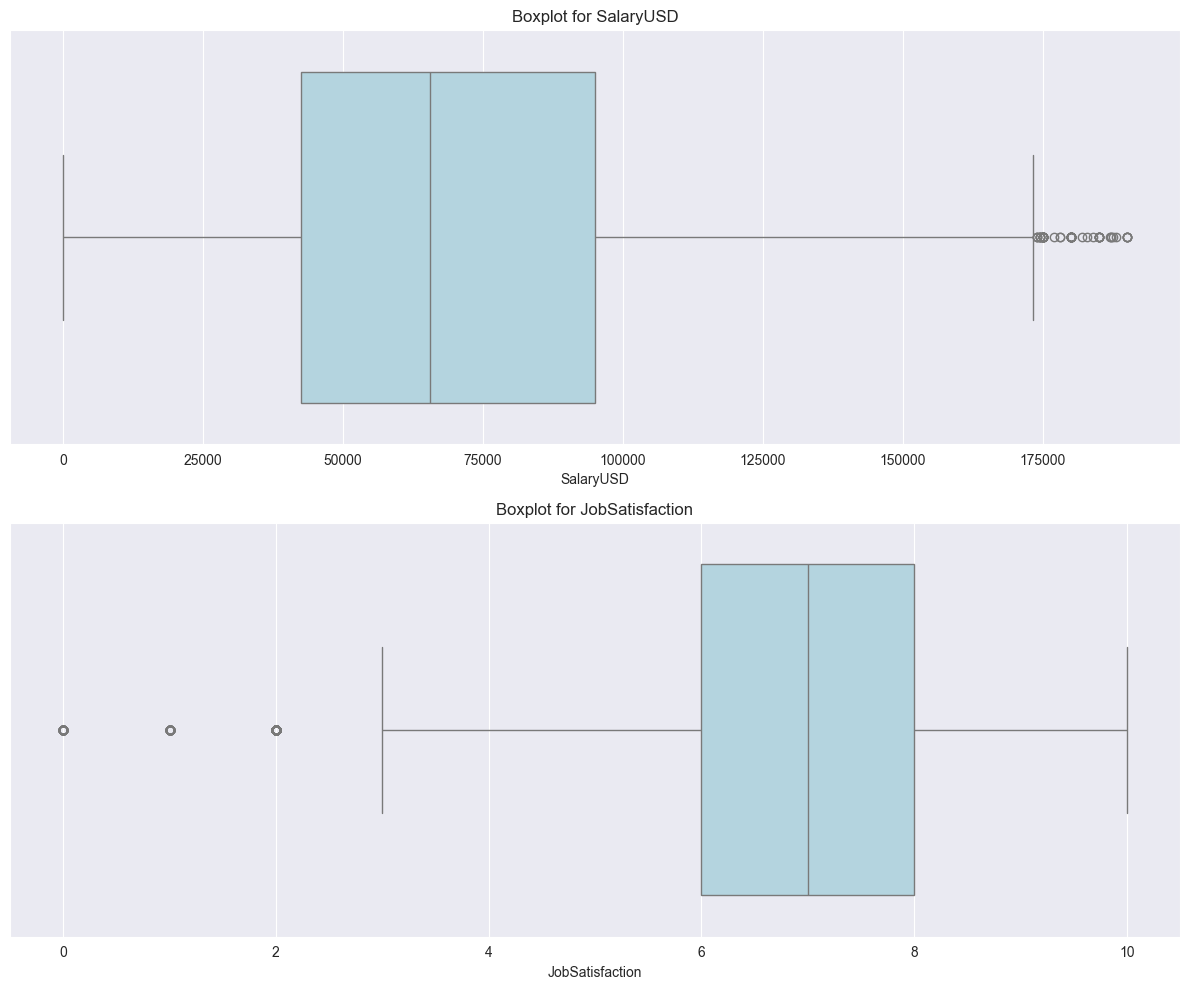

,Column,Number of Outliers,Total non-null values
0,SalaryUSD,74,8215
1,JobSatisfaction,328,8215


In [97]:
columns_numeric = {
    'SalaryUSD',
    'JobSatisfaction',
}

number_of_outliers = {}

number_of_values = {}

plt.figure(figsize=(12, 5 * len(columns_numeric)))

for index, column in enumerate(columns_numeric, 1):
    Q1 = df_professionals[column].quantile(0.25)
    Q3 = df_professionals[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_professionals[(df_professionals[column] < lower_bound) | (df_professionals[column] > upper_bound)]

    number_of_outliers[column] = outliers.shape[0]
    number_of_values[column] = df_professionals[column].notnull().sum()

    plt.subplot(len(columns_numeric), 1, index)
    sns.boxplot(x=df_professionals[column], color='lightblue')
    plt.title(f'Boxplot for {column}')

outliers_df = pd.DataFrame({
    'Column': list(columns_numeric),
    'Number of Outliers': [number_of_outliers[col] for col in columns_numeric],
    'Total non-null values': [number_of_values[col] for col in columns_numeric]
})

plt.tight_layout()
plt.show()
outliers_df